# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('evaluation-data.csv')
results.head()

,actual,prob
0,1.0,0.650790
1,1.0,0.772166
2,1.0,0.647421
3,1.0,0.612818
4,1.0,0.596953


In [2]:
#No Null Values 
results.isna().sum().sum()

0

## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

# Question 1
- Determine the distribution of the actual event.
- Would you be concern about bias due to imbalance?

1    3000
0    2000
Name: actual, dtype: int64

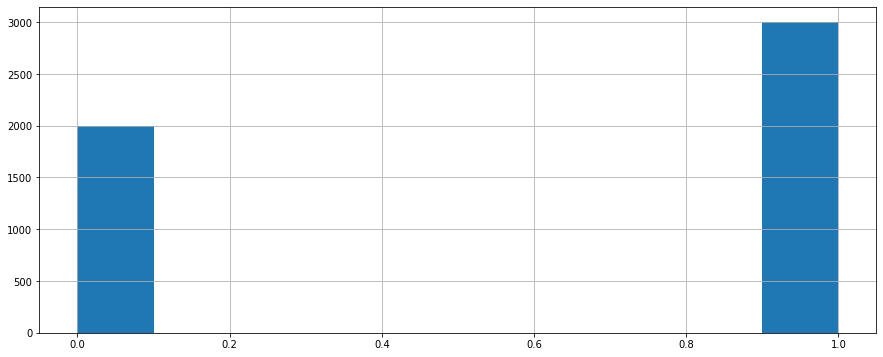

In [3]:
# insert code here
results['actual']=results['actual'].map({1.0:1, 0.0:0 })
results['actual'].hist(bins =10, figsize=(15,6));
results['actual'].value_counts()


Inference: Imbalanced target variable so it will effect on Classification. It could also be balanced by using sampling techniques and SMOTE techniques.

# Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

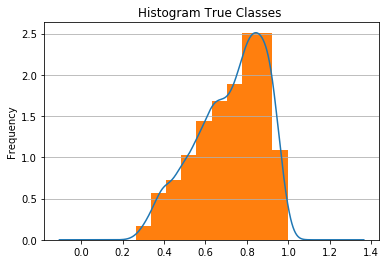

In [4]:
# histogram that shows the distribution of the probabilities for the True and False classes.
results_True= results.loc[results.actual==1]

fig , ax = plt.subplots()
results_True['prob'].plot.kde(ax=ax, legend=False, title='Histogram True Classes ')
results_True['prob'].plot.hist(density=True,ax=ax)
ax.grid(axis='y')

In [5]:
results_True['prob'].mean()

0.7206234848060831

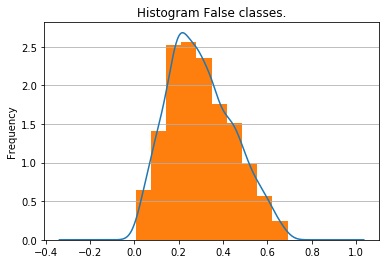

In [6]:
results_False= results.loc[results.actual==0]

fig , ax = plt.subplots()
results_False['prob'].plot.kde(ax=ax, legend=False, title='Histogram False classes.')
results_False['prob'].plot.hist(density=True,ax=ax)
ax.grid(axis='y')

In [7]:
results_False['prob'].mean()

0.29850667552020194

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


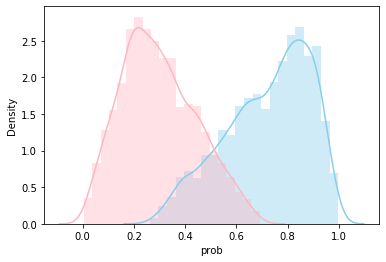

In [8]:
import seaborn as sns
sns.distplot(results_True['prob'], color='skyblue', label = 'Histogram True Classes')
sns.distplot(results_False['prob'], color='lightpink', label = 'Histogram False Classes')
plt.show()

Inference: 
All True Classifications are Left-Skewed (Negative Skewness)
All False Classifications are Right-Skewed (Positive Skewness)

# Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [9]:
# insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(results['prob'], results['actual'], test_size=0.33 , random_state=124)
X_train=X_train.values.reshape(-1,1)

In [10]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
#Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
ypred = model.predict(X_train)
Confusion_Matrix = confusion_matrix(y_train, ypred)
Confusion_Matrix

array([[1178,  192],
       [ 193, 1787]], dtype=int64)

In [12]:
acc = accuracy_score(y_train, ypred)
acc

0.8850746268656716

In [13]:
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train)[:,1],drop_intermediate=False)

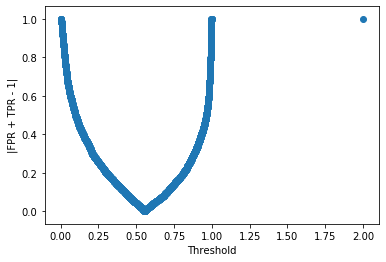

In [14]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [15]:
#As you can see, we have a minimum  threshold slightly nearly  0.5. The correct value is
thresholds[np.argmin(np.abs(fpr+tpr-1))]


0.5560781290268828

In [16]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

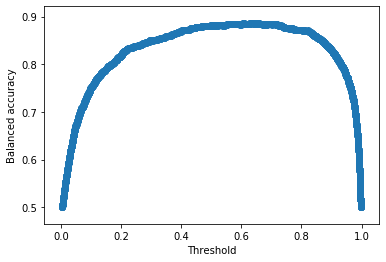

In [17]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [18]:
#There is a clear maximum between 0.4 and 0.8. Its exact value is:
threshold[np.argmax(accuracy)]

0.6317577413457843

Inference: So if we use 0.5 is the threshold then based on observation min threshold as 0.55 so 
below 0.55 we can consider as False (0) else True(1)

# Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model?


Accuracy= $(TP+TN)/(TP+TN+FP+FN)$ , 
precision= $TP/(TP+FP)$ , 
Recall= $TP/(TP+FN)$ , 
F1_Score=  $2* (Precision*Recall)/(Precision+Recall)$ , 

Confusion_Matrix= $[TN  FP]$
                  $[FN  TP]$

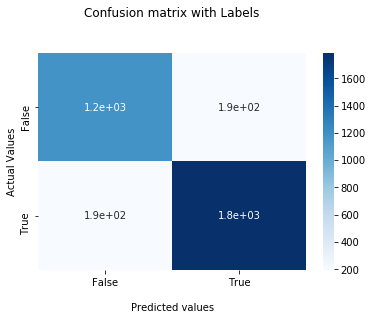

In [19]:
import seaborn as sns
ax=sns.heatmap(Confusion_Matrix, annot=True,cmap='Blues')
ax.set_title("Confusion matrix with Labels\n\n")
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [20]:
# with out using any pre-built functions.
Accuracy = (1178+1787)/(1178+192+193+1787)
precision = (1787)/(1787+192)
Recall = (1787)/(1787+193)
f1_Score= 2*(precision*Recall)/(precision+Recall)
 

      
print(" Accuracy Score ",Accuracy)
print(" precision Score ",precision)
print(" Recall Score ", Recall)
print( " f1 Score " , f1_Score)     

 Accuracy Score  0.8850746268656716
 precision Score  0.9029813036887316
 Recall Score  0.9025252525252525
 f1 Score  0.9027532205102299


In [21]:
#using pre-built functions.

from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score , precision_score,recall_score,f1_score

print( " Accuracy Score ", accuracy_score(y_train, ypred))
print( " precision Score ", precision_score(y_train, ypred))
print( " recall Score ", recall_score(y_train, ypred))
print( " f1 Score ", f1_score(y_train, ypred))

 Accuracy Score  0.8850746268656716
 precision Score  0.9029813036887316
 recall Score  0.9025252525252525
 f1 Score  0.9027532205102299


Inference: Since it's Imbalenced dataset. 

so we can consider f1 Score for performace Evaluation for Imbalenced Classification 

# Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


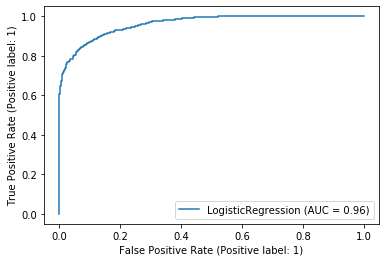

In [22]:
# Insert code here

plot_roc_curve(model,X_train,y_train)



Inference:
The idea of using the ROC curve for tuning the threshold is to identify that threshold that gives us the upper-left corner of the curve

The AUC for this logistic regression model turns out to be 0.96. Since this is close to 1 , this confirms that the model does a Good job of classifying data.